this notebook is for Week7-Assignment
author: Rui Zeng, N15471955, rz2522@nyu.edu
assignment:
Using mdtraj, in a jupyter notebook, align your alphafold predictions to the crystal structure and make a bar plot showing the RMSD of each predicted structure to the crystal structure based on alpha-carbons and based on the full backbone and side-chains. Does alphafold get everything right or just the backbone structure? 
(Bonus) In your jupyter notebook, load the pkl files and get the average PLDDT score for each predicted structure. Make a scatter plot of PLDDT vs RMSD of prediction. Are they correlated in your case?

In [1]:
# load libraries
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

After testing, here we should use unrelaxed structure to compare with crystal structure in pdb.
The RMSD between relaxed structure (either from Greene or Colab) is very high.
In RoseTTAfold, the structure is unrelaxed.
Best Greene structure: model 2 (Greene_1)
Best AlphaFold2 strucuter: model 5 (Colab_1)


In [2]:
# pdb path
pdb_path_crystal = '../Data/C_Lysozyme/1lys.pdb'
# pdb_path_Greene_0 = '../Data/C_Lysozyme/Lysozyme_Greene/ranked_0.pdb'
# pdb_path_Greene_1 = '../Data/C_Lysozyme/Lysozyme_Greene/ranked_1.pdb'
# pdb_path_Greene_2 = '../Data/C_Lysozyme/Lysozyme_Greene/ranked_2.pdb'
# pdb_path_Greene_3 = '../Data/C_Lysozyme/Lysozyme_Greene/ranked_3.pdb'
# pdb_path_Greene_4 = '../Data/C_Lysozyme/Lysozyme_Greene/ranked_4.pdb'
pdb_path_Greene_0 = '../Data/C_Lysozyme/Lysozyme_Greene/unrelaxed_model_1_pred_0.pdb'
pdb_path_Greene_1 = '../Data/C_Lysozyme/Lysozyme_Greene/unrelaxed_model_2_pred_0.pdb'
pdb_path_Greene_2 = '../Data/C_Lysozyme/Lysozyme_Greene/unrelaxed_model_3_pred_0.pdb'
pdb_path_Greene_3 = '../Data/C_Lysozyme/Lysozyme_Greene/unrelaxed_model_4_pred_0.pdb'
pdb_path_Greene_4 = '../Data/C_Lysozyme/Lysozyme_Greene/unrelaxed_model_5_pred_0.pdb'
pdb_path_Colab_1 = '../Data/C_Lysozyme/Lysozyme_relaxed_Alphafold2/Lysozyme_relaxed_ce6c6_unrelaxed_rank_1_model_5.pdb'
pdb_path_Colab_2 = '../Data/C_Lysozyme/Lysozyme_relaxed_Alphafold2/Lysozyme_relaxed_ce6c6_unrelaxed_rank_2_model_4.pdb'
pdb_path_Colab_3 = '../Data/C_Lysozyme/Lysozyme_relaxed_Alphafold2/Lysozyme_relaxed_ce6c6_unrelaxed_rank_3_model_3.pdb'
pdb_path_Colab_4 = '../Data/C_Lysozyme/Lysozyme_relaxed_Alphafold2/Lysozyme_relaxed_ce6c6_unrelaxed_rank_4_model_2.pdb'
pdb_path_Colab_5 = '../Data/C_Lysozyme/Lysozyme_relaxed_Alphafold2/Lysozyme_relaxed_ce6c6_unrelaxed_rank_5_model_1.pdb'
pdb_path_Rose = '../Data/C_Lysozyme/Lysozyme_RoseTTAfold/pred.scwrl.pdb'
# pkl path
pkl_path_Greene_0 = '../Data/C_Lysozyme/Lysozyme_Greene/result_model_1_pred_0.pkl'
pkl_path_Greene_1 = '../Data/C_Lysozyme/Lysozyme_Greene/result_model_2_pred_0.pkl'
pkl_path_Greene_2 = '../Data/C_Lysozyme/Lysozyme_Greene/result_model_3_pred_0.pkl'
pkl_path_Greene_3 = '../Data/C_Lysozyme/Lysozyme_Greene/result_model_4_pred_0.pkl'
pkl_path_Greene_4 = '../Data/C_Lysozyme/Lysozyme_Greene/result_model_5_pred_0.pkl'
# json path
json_path_Colab_1 = '../Data/C_Lysozyme/Lysozyme_relaxed_Alphafold2/Lysozyme_relaxed_ce6c6_unrelaxed_rank_1_model_5_scores.json'
json_path_Colab_2 = '../Data/C_Lysozyme/Lysozyme_relaxed_Alphafold2/Lysozyme_relaxed_ce6c6_unrelaxed_rank_2_model_4_scores.json'
json_path_Colab_3 = '../Data/C_Lysozyme/Lysozyme_relaxed_Alphafold2/Lysozyme_relaxed_ce6c6_unrelaxed_rank_3_model_3_scores.json'
json_path_Colab_4 = '../Data/C_Lysozyme/Lysozyme_relaxed_Alphafold2/Lysozyme_relaxed_ce6c6_unrelaxed_rank_4_model_2_scores.json'
json_path_Colab_5 = '../Data/C_Lysozyme/Lysozyme_relaxed_Alphafold2/Lysozyme_relaxed_ce6c6_unrelaxed_rank_5_model_1_scores.json'


In [47]:
# load crystal structure, only chain A
pdb_crystal = md.load_pdb(pdb_path_crystal)
pdb_crystal = pdb_crystal.atom_slice(pdb_crystal.top.select('chainid 0'))
# load other pdb
pdb_Greene_0 = md.load_pdb(pdb_path_Greene_0)
pdb_Greene_1 = md.load_pdb(pdb_path_Greene_1)
pdb_Greene_2 = md.load_pdb(pdb_path_Greene_2)
pdb_Greene_3 = md.load_pdb(pdb_path_Greene_3)
pdb_Greene_4 = md.load_pdb(pdb_path_Greene_4)
pdb_Colab_1 = md.load_pdb(pdb_path_Colab_1)
pdb_Colab_2 = md.load_pdb(pdb_path_Colab_2)
pdb_Colab_3 = md.load_pdb(pdb_path_Colab_3)
pdb_Colab_4 = md.load_pdb(pdb_path_Colab_4)
pdb_Colab_5 = md.load_pdb(pdb_path_Colab_5)
pdb_Rose = md.load_pdb(pdb_path_Rose)
# load pkl file with numpy
pkl_Greene_0 = np.load(pkl_path_Greene_0, allow_pickle=True)
pkl_Greene_1 = np.load(pkl_path_Greene_1, allow_pickle=True)
pkl_Greene_2 = np.load(pkl_path_Greene_2, allow_pickle=True)
pkl_Greene_3 = np.load(pkl_path_Greene_3, allow_pickle=True)
pkl_Greene_4 = np.load(pkl_path_Greene_4, allow_pickle=True)
# load json file with json
import json
json_Colab_1 = json.load(open(json_path_Colab_1))
json_Colab_2 = json.load(open(json_path_Colab_2))
json_Colab_3 = json.load(open(json_path_Colab_3))
json_Colab_4 = json.load(open(json_path_Colab_4))
json_Colab_5 = json.load(open(json_path_Colab_5))

In [65]:
# selection - alpha carbon
selection_1 = 'name CA'
# check the number of selected atoms
print('Selection = alpha carbon')
print('Crystal Structure: ', pdb_crystal.top.select(selection_1).shape[0])
print('Greene: ', pdb_Greene_0.top.select(selection_1).shape[0])
print('Colab: ', pdb_Colab_1.top.select(selection_1).shape[0])
print('Rose: ', pdb_Rose.top.select(selection_1).shape[0])
# selection - backbone
selection_2 = 'backbone'
# check the number of selected atoms
print('Selection = backbone')
print('Crystal Structure: ', pdb_crystal.top.select(selection_2).shape[0])
print('Greene: ', pdb_Greene_0.top.select(selection_2).shape[0])
print('Colab: ', pdb_Colab_1.top.select(selection_2).shape[0])
print('Rose: ', pdb_Rose.top.select(selection_2).shape[0])
# selection - side chains
selection_3 = 'sidechain and not (index == 1000)'
# after check, the index 1000 Oxygen is not in alphafold2 model
# check the number of selected atoms
print('Selection = side chain')
print('Crystal Structure: ', pdb_crystal.top.select(selection_3).shape[0])
print('Greene: ', pdb_Greene_0.top.select(selection_3).shape[0])
print('Colab: ', pdb_Colab_1.top.select(selection_3).shape[0])
print('Rose: ', pdb_Rose.top.select(selection_3).shape[0])

Selection = alpha carbon
Crystal Structure:  129
Greene:  129
Colab:  129
Rose:  129
Selection = backbone
Crystal Structure:  516
Greene:  516
Colab:  516
Rose:  516
Selection = side chain
Crystal Structure:  484
Greene:  484
Colab:  484
Rose:  484


In [66]:
# calculate RMSD on alpha carbon
rmsd_Greene_0_selection_1 = md.rmsd(pdb_crystal, pdb_Greene_0, atom_indices=pdb_crystal.top.select(selection_1))
rmsd_Greene_1_selection_1 = md.rmsd(pdb_crystal, pdb_Greene_1, atom_indices=pdb_crystal.top.select(selection_1))
rmsd_Greene_2_selection_1 = md.rmsd(pdb_crystal, pdb_Greene_2, atom_indices=pdb_crystal.top.select(selection_1))
rmsd_Greene_3_selection_1 = md.rmsd(pdb_crystal, pdb_Greene_3, atom_indices=pdb_crystal.top.select(selection_1))
rmsd_Greene_4_selection_1 = md.rmsd(pdb_crystal, pdb_Greene_4, atom_indices=pdb_crystal.top.select(selection_1))
rmsd_Colab_1_selection_1 = md.rmsd(pdb_crystal, pdb_Colab_1, atom_indices=pdb_crystal.top.select(selection_1))
rmsd_Colab_2_selection_1 = md.rmsd(pdb_crystal, pdb_Colab_2, atom_indices=pdb_crystal.top.select(selection_1))
rmsd_Colab_3_selection_1 = md.rmsd(pdb_crystal, pdb_Colab_3, atom_indices=pdb_crystal.top.select(selection_1))
rmsd_Colab_4_selection_1 = md.rmsd(pdb_crystal, pdb_Colab_4, atom_indices=pdb_crystal.top.select(selection_1))
rmsd_Colab_5_selection_1 = md.rmsd(pdb_crystal, pdb_Colab_5, atom_indices=pdb_crystal.top.select(selection_1))
rmsd_Rose_selection_1 = md.rmsd(pdb_crystal, pdb_Rose, atom_indices=pdb_crystal.top.select(selection_1))
# calculate RMSD on backbone
rmsd_Greene_0_selection_2 = md.rmsd(pdb_crystal, pdb_Greene_0, atom_indices=pdb_crystal.top.select(selection_2))
rmsd_Greene_1_selection_2 = md.rmsd(pdb_crystal, pdb_Greene_1, atom_indices=pdb_crystal.top.select(selection_2))
rmsd_Greene_2_selection_2 = md.rmsd(pdb_crystal, pdb_Greene_2, atom_indices=pdb_crystal.top.select(selection_2))
rmsd_Greene_3_selection_2 = md.rmsd(pdb_crystal, pdb_Greene_3, atom_indices=pdb_crystal.top.select(selection_2))
rmsd_Greene_4_selection_2 = md.rmsd(pdb_crystal, pdb_Greene_4, atom_indices=pdb_crystal.top.select(selection_2))
rmsd_Colab_1_selection_2 = md.rmsd(pdb_crystal, pdb_Colab_1, atom_indices=pdb_crystal.top.select(selection_2))
rmsd_Colab_2_selection_2 = md.rmsd(pdb_crystal, pdb_Colab_2, atom_indices=pdb_crystal.top.select(selection_2))
rmsd_Colab_3_selection_2 = md.rmsd(pdb_crystal, pdb_Colab_3, atom_indices=pdb_crystal.top.select(selection_2))
rmsd_Colab_4_selection_2 = md.rmsd(pdb_crystal, pdb_Colab_4, atom_indices=pdb_crystal.top.select(selection_2))
rmsd_Colab_5_selection_2 = md.rmsd(pdb_crystal, pdb_Colab_5, atom_indices=pdb_crystal.top.select(selection_2))
rmsd_Rose_selection_2 = md.rmsd(pdb_crystal, pdb_Rose, atom_indices=pdb_crystal.top.select(selection_2))
# calculate RMSD on side chains
rmsd_Greene_0_selection_3 = md.rmsd(pdb_crystal, pdb_Greene_0, atom_indices=pdb_crystal.top.select(selection_3))
rmsd_Greene_1_selection_3 = md.rmsd(pdb_crystal, pdb_Greene_1, atom_indices=pdb_crystal.top.select(selection_3))
rmsd_Greene_2_selection_3 = md.rmsd(pdb_crystal, pdb_Greene_2, atom_indices=pdb_crystal.top.select(selection_3))
rmsd_Greene_3_selection_3 = md.rmsd(pdb_crystal, pdb_Greene_3, atom_indices=pdb_crystal.top.select(selection_3))
rmsd_Greene_4_selection_3 = md.rmsd(pdb_crystal, pdb_Greene_4, atom_indices=pdb_crystal.top.select(selection_3))
rmsd_Colab_1_selection_3 = md.rmsd(pdb_crystal, pdb_Colab_1, atom_indices=pdb_crystal.top.select(selection_3))
rmsd_Colab_2_selection_3 = md.rmsd(pdb_crystal, pdb_Colab_2, atom_indices=pdb_crystal.top.select(selection_3))
rmsd_Colab_3_selection_3 = md.rmsd(pdb_crystal, pdb_Colab_3, atom_indices=pdb_crystal.top.select(selection_3))
rmsd_Colab_4_selection_3 = md.rmsd(pdb_crystal, pdb_Colab_4, atom_indices=pdb_crystal.top.select(selection_3))
rmsd_Colab_5_selection_3 = md.rmsd(pdb_crystal, pdb_Colab_5, atom_indices=pdb_crystal.top.select(selection_3))
rmsd_Rose_selection_3 = md.rmsd(pdb_crystal, pdb_Rose, atom_indices=pdb_crystal.top.select(selection_3))


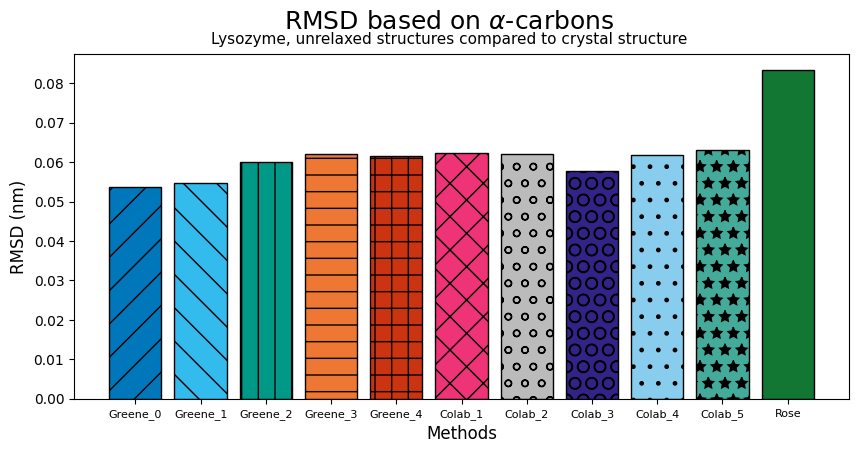

In [67]:
# figure 1 - bar plot - RMSD on alpha carbons
fig = plt.figure(figsize=(10, 5))

# data set
data = [rmsd_Greene_0_selection_1, rmsd_Greene_1_selection_1, rmsd_Greene_2_selection_1, rmsd_Greene_3_selection_1, rmsd_Greene_4_selection_1, rmsd_Colab_1_selection_1, rmsd_Colab_2_selection_1, rmsd_Colab_3_selection_1, rmsd_Colab_4_selection_1, rmsd_Colab_5_selection_1, rmsd_Rose_selection_1]
# data set labels
labels = ['Greene_0', 'Greene_1', 'Greene_2', 'Greene_3', 'Greene_4', 'Colab_1', 'Colab_2', 'Colab_3', 'Colab_4', 'Colab_5', 'Rose']

# set 11 colors, colorblind friendly, different grayscales from blue to red
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']
# insert more colors, colorblind friendly, different grayscales from blue to red
colors = colors + ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#882255', '#AA4499']
# set bar width
bar_width = 0.8
# set 11 different hatch patterns
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*', '']

# plot bars
for i in range(len(data)):
    plt.bar(labels[i], data[i], width=bar_width, color=colors[i], edgecolor='black', hatch=hatches[i])
    i += 1

# labels, font size 12
plt.xlabel('Methods', fontsize=12)
plt.ylabel('RMSD (nm)', fontsize=12)

# x ticks, font size 8
plt.xticks(fontsize=8)

# two lines of title
plt.text(x=0.5, y=0.85, s="RMSD based on "r'$\alpha$-carbons', fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "Lysozyme, unrelaxed structures compared to crystal structure", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig1.[Lysozyme]RMSD_comparison.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')



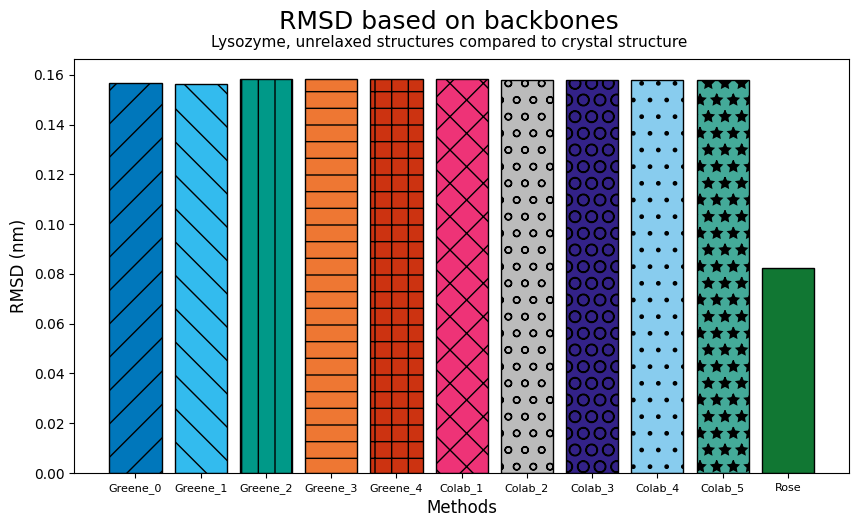

In [68]:
# figure 2 - bar plot, RMSD based on backbone
fig = plt.figure(figsize=(10, 6))

# data set
data = [rmsd_Greene_0_selection_2, rmsd_Greene_1_selection_2, rmsd_Greene_2_selection_2, rmsd_Greene_3_selection_2, rmsd_Greene_4_selection_2, rmsd_Colab_1_selection_2, rmsd_Colab_2_selection_2, rmsd_Colab_3_selection_2, rmsd_Colab_4_selection_2, rmsd_Colab_5_selection_2, rmsd_Rose_selection_2]
# data set labels
labels = ['Greene_0', 'Greene_1', 'Greene_2', 'Greene_3', 'Greene_4', 'Colab_1', 'Colab_2', 'Colab_3', 'Colab_4', 'Colab_5', 'Rose']

# set 11 colors, colorblind friendly, different grayscales from blue to red
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']
# insert more colors, colorblind friendly, different grayscales from blue to red
colors = colors + ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#882255', '#AA4499']
# set bar width
bar_width = 0.8
# set 11 different hatch patterns
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*', '']

# plot bars
for i in range(len(data)):
    plt.bar(labels[i], data[i], width=bar_width, color=colors[i], edgecolor='black', hatch=hatches[i])
    i += 1

# labels, font size 12
plt.xlabel('Methods', fontsize=12)
plt.ylabel('RMSD (nm)', fontsize=12)

# x ticks, font size 8
plt.xticks(fontsize=8)

# two lines of title
plt.text(x=0.5, y=0.85, s="RMSD based on backbones", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "Lysozyme, unrelaxed structures compared to crystal structure", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig2.[Lysozyme]RMSD_backbones.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')



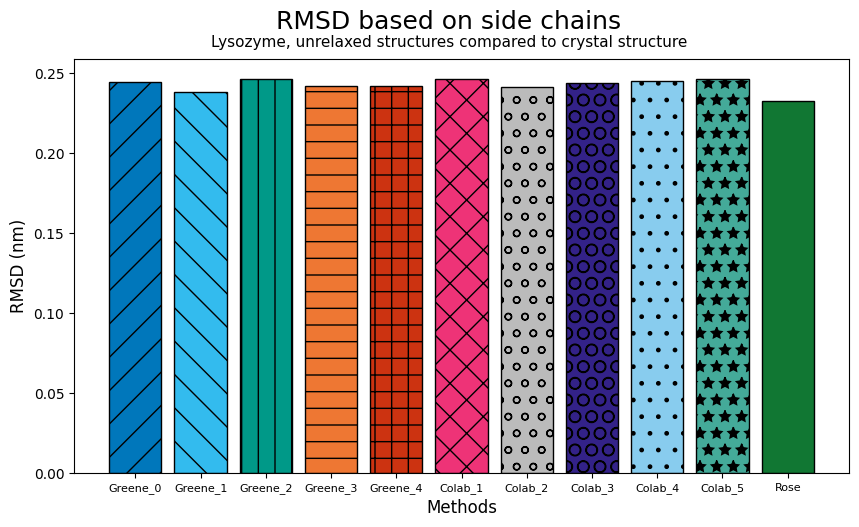

In [69]:
# figure 3 - bar plot, RMSD based on side chains
fig = plt.figure(figsize=(10, 6))

# data set
data = [rmsd_Greene_0_selection_3, rmsd_Greene_1_selection_3, rmsd_Greene_2_selection_3, rmsd_Greene_3_selection_3, rmsd_Greene_4_selection_3, rmsd_Colab_1_selection_3, rmsd_Colab_2_selection_3, rmsd_Colab_3_selection_3, rmsd_Colab_4_selection_3, rmsd_Colab_5_selection_3, rmsd_Rose_selection_3]
# data set labels
labels = ['Greene_0', 'Greene_1', 'Greene_2', 'Greene_3', 'Greene_4', 'Colab_1', 'Colab_2', 'Colab_3', 'Colab_4', 'Colab_5', 'Rose']

# set 11 colors, colorblind friendly, different grayscales from blue to red
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']
# insert more colors, colorblind friendly, different grayscales from blue to red
colors = colors + ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#882255', '#AA4499']
# set bar width
bar_width = 0.8
# set 11 different hatch patterns
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.', '*', '']

# plot bars
for i in range(len(data)):
    plt.bar(labels[i], data[i], width=bar_width, color=colors[i], edgecolor='black', hatch=hatches[i])
    i += 1

# labels, font size 12
plt.xlabel('Methods', fontsize=12)
plt.ylabel('RMSD (nm)', fontsize=12)

# x ticks, font size 8
plt.xticks(fontsize=8)

# two lines of title
plt.text(x=0.5, y=0.85, s="RMSD based on side chains", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "Lysozyme, unrelaxed structures compared to crystal structure", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig3.[Lysozyme]RMSD_side_chains.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')



[0 1 2]
[0.05463557 0.06221167 0.08330826]


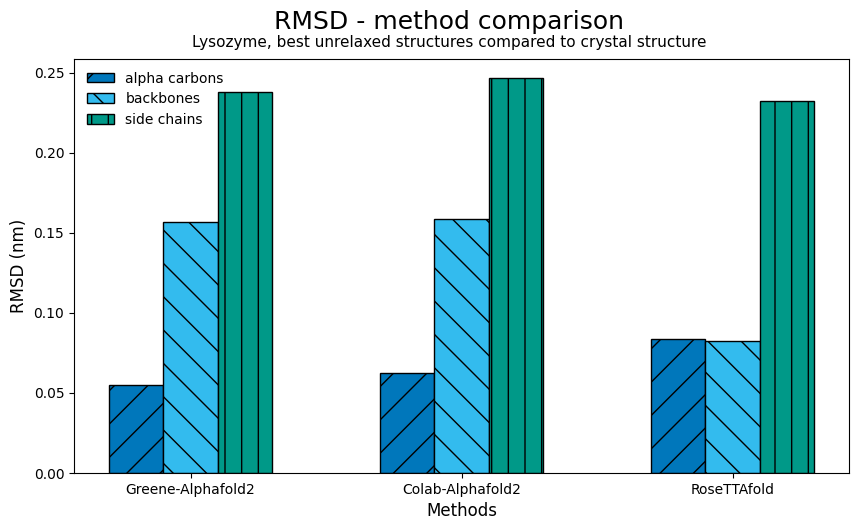

In [72]:
# figure 4 - bar plot, RMSD, best structures
fig = plt.figure(figsize=(10, 6))

# data set
# best structures are Greene_1, Colab_1, Rose
# convert to 1D array
data_alpha_carbons = np.array([rmsd_Greene_1_selection_1, rmsd_Colab_1_selection_1, rmsd_Rose_selection_1]).flatten()
data_backbones = np.array([rmsd_Greene_1_selection_2, rmsd_Colab_1_selection_2, rmsd_Rose_selection_2]).flatten()
data_side_chains = np.array([rmsd_Greene_1_selection_3, rmsd_Colab_1_selection_3, rmsd_Rose_selection_3]).flatten()
# data set labels
labels = ['Greene_1', 'Colab_1', 'Rose']

# set 9 colors, colorblind friendly, different grayscales from blue to red
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']
# insert more colors, colorblind friendly, different grayscales from blue to red
colors = colors + ['#332288', '#88CCEE', '#44AA99', '#117733', '#999933', '#DDCC77', '#CC6677', '#882255', '#AA4499']
# set bar width
bar_width = 0.2
# set 9 different hatch patterns
hatches = ['/', '\\', '|', '-', '+', 'x', 'o', 'O', '.']


# Set position of bar on X axis
br1 = np.arange(len(data_alpha_carbons))
br2 = [x + bar_width for x in br1]
br3 = [x + bar_width for x in br2]

print(br1)
print(data_alpha_carbons)
# plot bars
plt.bar(br1, data_alpha_carbons, color=colors[0], width=bar_width, edgecolor='black', hatch=hatches[0], label='alpha carbons')
plt.bar(br2, data_backbones, color=colors[1], width=bar_width, edgecolor='black', hatch=hatches[1], label='backbones')
plt.bar(br3, data_side_chains, color=colors[2], width=bar_width, edgecolor='black', hatch=hatches[2], label='side chains')

# labels, font size 12
plt.xlabel('Methods', fontsize=12)
plt.ylabel('RMSD (nm)', fontsize=12)

# Adding xticks
plt.xticks([r + bar_width for r in range(len(data_alpha_carbons))],
        ['Greene-Alphafold2', 'Colab-Alphafold2', 'RoseTTAfold'])

# legend
plt.legend(fontsize=10,frameon=False, loc='upper left')

# two lines of title
plt.text(x=0.5, y=0.85, s="RMSD - method comparison", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.82, s= "Lysozyme, best unrelaxed structures compared to crystal structure", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig4.[Lysozyme]RMSD_method_comparison.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')


In [73]:
# print pkl_Greene_0
#print(pkl_Greene_0)
# read plddt values
plddt_Greene_0 = pkl_Greene_0['ranking_confidence']
plddt_Greene_1 = pkl_Greene_1['ranking_confidence']
plddt_Greene_2 = pkl_Greene_2['ranking_confidence']
plddt_Greene_3 = pkl_Greene_3['ranking_confidence']
plddt_Greene_4 = pkl_Greene_4['ranking_confidence']
plddt_Colab_1 = np.mean(json_Colab_1['plddt'])
plddt_Colab_2 = np.mean(json_Colab_2['plddt'])
plddt_Colab_3 = np.mean(json_Colab_3['plddt'])
plddt_Colab_4 = np.mean(json_Colab_4['plddt'])
plddt_Colab_5 = np.mean(json_Colab_5['plddt'])


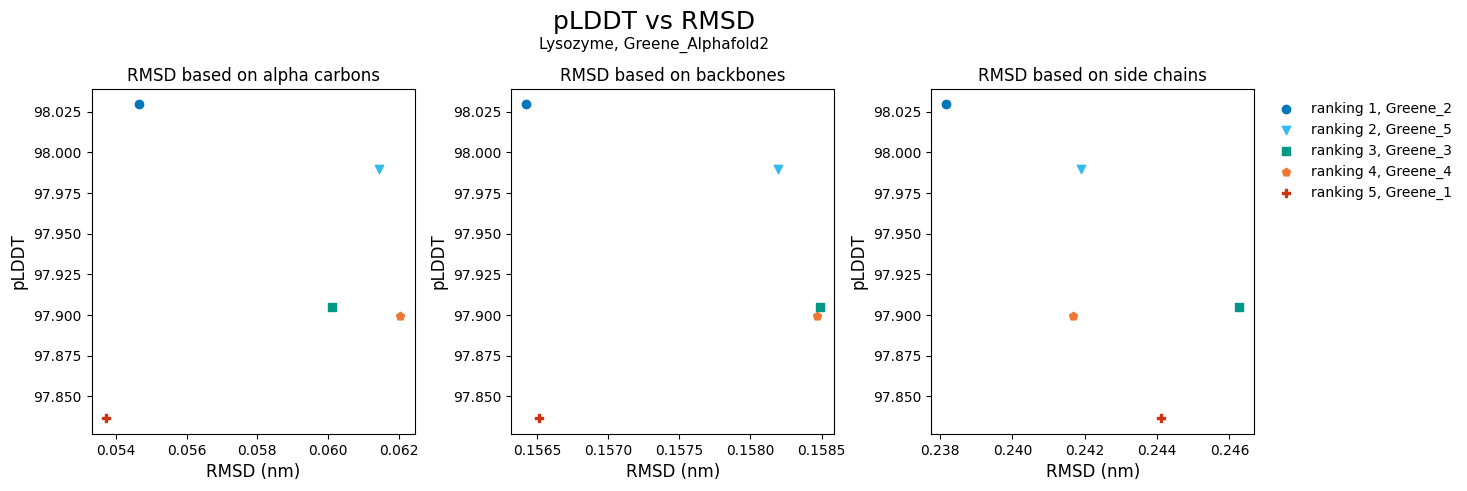

In [74]:
# figure 5 - scatter plot, pLDDT vs RMSD
fig,axes = plt.subplots(1, 3, figsize=(15, 5))

# data set
rmsd_Greene = [[rmsd_Greene_0_selection_1, rmsd_Greene_1_selection_1, rmsd_Greene_2_selection_1, rmsd_Greene_3_selection_1, rmsd_Greene_4_selection_1]
, [rmsd_Greene_0_selection_2, rmsd_Greene_1_selection_2, rmsd_Greene_2_selection_2, rmsd_Greene_3_selection_2, rmsd_Greene_4_selection_2]
, [rmsd_Greene_0_selection_3, rmsd_Greene_1_selection_3, rmsd_Greene_2_selection_3, rmsd_Greene_3_selection_3, rmsd_Greene_4_selection_3]] 
plddt_Greene = [plddt_Greene_0, plddt_Greene_1, plddt_Greene_2, plddt_Greene_3, plddt_Greene_4]
selections = ['alpha carbons', 'backbones', 'side chains']
# plDDT ranking is 2, 5, 3, 4, 1
rankings = [2, 5, 3, 4, 1]

# colors
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']
# scatter markers
markers = ['o', 'v', 's', 'p', 'P', '*', 'h', 'H', 'X', 'D', 'd']

# plot pLDDT vs RMSD
for i in range(3):
    for j in range(5):
        r=rankings[j]-1
        #print(r)
        axes[i].scatter(rmsd_Greene[i][r], plddt_Greene[r], color=colors[j], marker=markers[j],
        label='ranking {}'.format(j+1)+', Greene_{}'.format(r+1))
        axes[i].set_xlabel('RMSD (nm)', fontsize=12)
        axes[i].set_ylabel('pLDDT', fontsize=12)
        axes[i].set_title('RMSD based on ' + selections[i], fontsize=12)
        j += 1
    i += 1


# labels, font size 12
plt.xlabel('RMSD (nm)', fontsize=12)
plt.ylabel('pLDDT', fontsize=12)

# legend
plt.legend(fontsize=10,frameon=False, loc='upper right', bbox_to_anchor=(1.65,1))

# two lines of title
plt.text(x=0.5, y=0.92, s="pLDDT vs RMSD", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.88, s= "Lysozyme, Greene_Alphafold2", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig5.[Lysozyme]pLDDT_vs_RMSD_Greene.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')


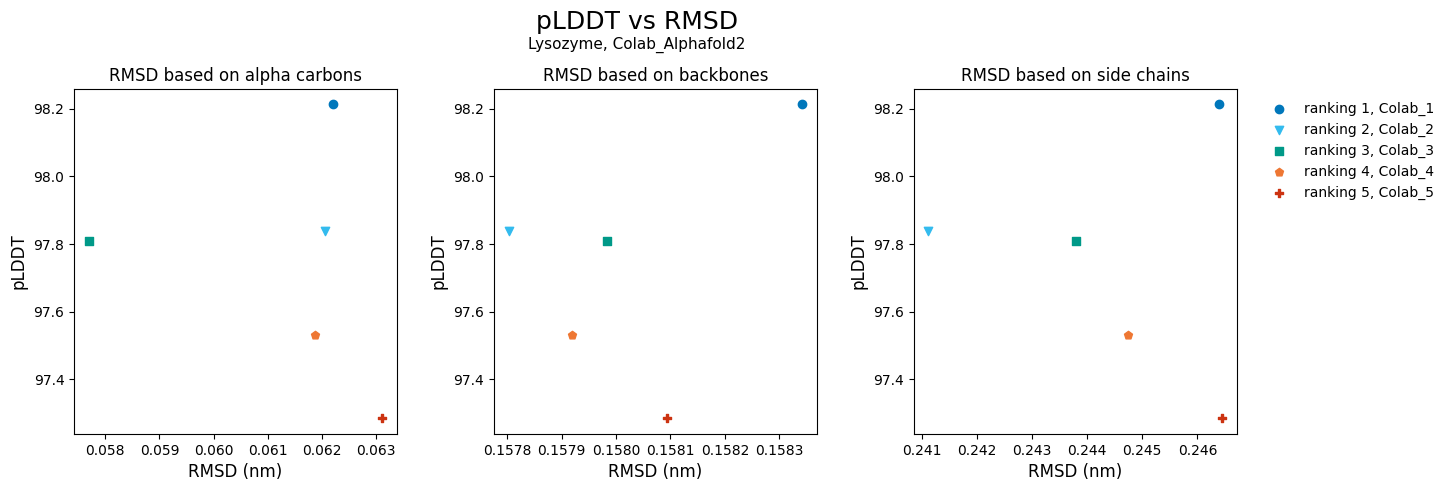

In [75]:
# figure 6 - scatter plot, pLDDT vs RMSD
fig,axes = plt.subplots(1, 3, figsize=(15, 5))

# data set
rmsd_Colab = [[rmsd_Colab_1_selection_1, rmsd_Colab_2_selection_1, rmsd_Colab_3_selection_1, rmsd_Colab_4_selection_1, rmsd_Colab_5_selection_1]
, [rmsd_Colab_1_selection_2, rmsd_Colab_2_selection_2, rmsd_Colab_3_selection_2, rmsd_Colab_4_selection_2, rmsd_Colab_5_selection_2]
, [rmsd_Colab_1_selection_3, rmsd_Colab_2_selection_3, rmsd_Colab_3_selection_3, rmsd_Colab_4_selection_3, rmsd_Colab_5_selection_3]]
plddt_Colab = [plddt_Colab_1, plddt_Colab_2, plddt_Colab_3, plddt_Colab_4, plddt_Colab_5]
selections = ['alpha carbons', 'backbones', 'side chains']
# plDDT ranking is 1, 2, 3, 4, 5
rankings = [1, 2, 3, 4, 5]

# colors
colors = ['#0077BB', '#33BBEE', '#009988', '#EE7733', '#CC3311', '#EE3377', '#BBBBBB']
# scatter markers
markers = ['o', 'v', 's', 'p', 'P', '*', 'h', 'H', 'X', 'D', 'd']

# plot pLDDT vs RMSD
for i in range(3):
    for j in range(5):
        r=rankings[j]-1
        #print(r)
        axes[i].scatter(rmsd_Colab[i][r], plddt_Colab[r], color=colors[j], marker=markers[j],
        label='ranking {}'.format(j+1)+', Colab_{}'.format(r+1))
        axes[i].set_xlabel('RMSD (nm)', fontsize=12)
        axes[i].set_ylabel('pLDDT', fontsize=12)
        axes[i].set_title('RMSD based on ' + selections[i], fontsize=12)
        j += 1
    i += 1


# labels, font size 12
plt.xlabel('RMSD (nm)', fontsize=12)
plt.ylabel('pLDDT', fontsize=12)

# legend
plt.legend(fontsize=10,frameon=False, loc='upper right', bbox_to_anchor=(1.65,1))

# two lines of title
plt.text(x=0.5, y=0.92, s="pLDDT vs RMSD", fontsize=18, ha="center", transform=fig.transFigure)
plt.text(x=0.5, y=0.88, s= "Lysozyme, Colab_Alphafold2", fontsize=11, ha="center", transform=fig.transFigure)
plt.subplots_adjust(top=0.8, wspace=0.3)

# save figure as pdf in ../Figures
fname = '../Figures/fig6.[Lysozyme]pLDDT_vs_RMSD_Colab.pdf'
plt.savefig(fname, format='pdf', dpi=300, bbox_inches='tight')